In [1]:
#お題①

In [2]:
#csvの読み込み
df <- read.table("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header= FALSE,sep =',')

#列名の変更
colnames(df) <- c("pregnant","glucose","diastolic_BP","subcutaneous_fat","serum_insulin","BMI"
                  ,"diabetes pedigree function","age","Diabetes")                 #9つの変数
head(df) 

,pregnant,glucose,diastolic_BP,subcutaneous_fat,serum_insulin,BMI,diabetes pedigree function,age,Diabetes
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [3]:
#欠測データの削除
df2 <- df[df$glucose!=0 & df$diastolic_BP!=0 & df$subcutaneous_fat!=0 & df$serum_insulin!=0 & df$BMI!=0,]

#正規化
df_scale <- scale(df2[,c(1:8)])

head(df_scale)

,pregnant,glucose,diastolic_BP,subcutaneous_fat,serum_insulin,BMI,diabetes pedigree function,age
4,-0.71651083,-1.0896533,-0.37317791,-0.5843629,-0.5221747,-0.7095143,-1.0305593,-0.9670632
5,-1.02789913,0.4657189,-2.45382847,0.5567094,0.1005024,1.4249091,5.1085822,0.2093178
7,-0.09373423,-1.4460927,-1.65357826,0.2714413,-0.5726620,-0.2968591,-0.7961084,-0.4769045
9,-0.40512253,2.4099341,-0.05307782,1.5076030,3.2559608,-0.3680065,-1.0566094,2.1699528
14,-0.71651083,2.1507054,-0.85332804,-0.5843629,5.8055711,-0.4249245,-0.3619399,2.7581434
15,0.52904237,1.4054229,0.10697222,-0.9647204,0.1594043,-1.0367925,0.1851123,1.9738893


In [4]:
#お題②

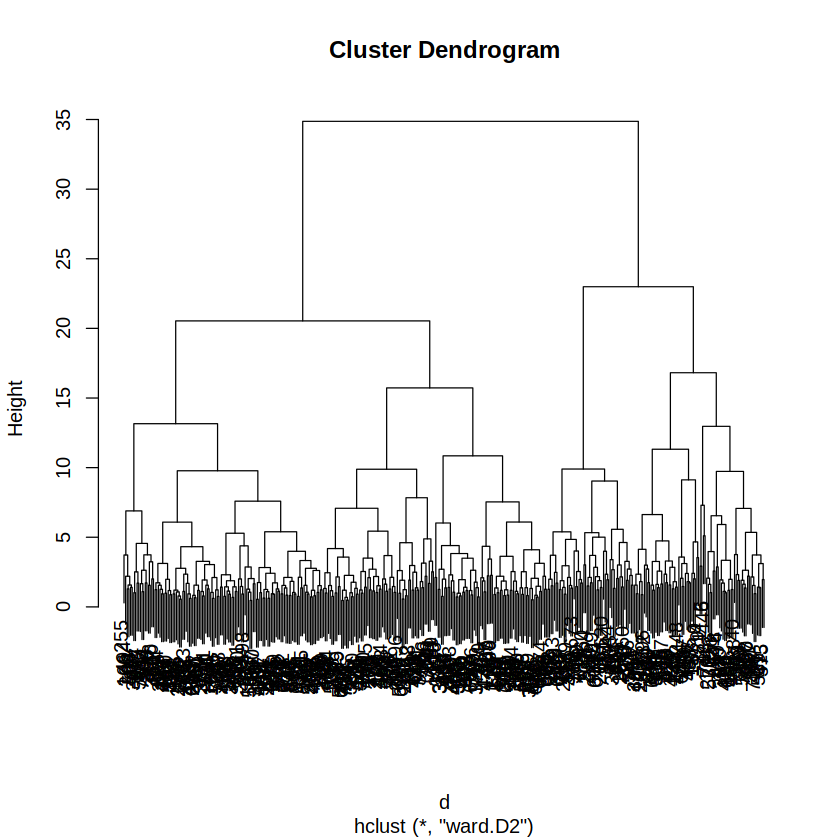

In [5]:
#階層的クラスタリング

d <- dist(df_scale,method="euclidean") #サンプル間の距離を総当りで計算

hc <- hclust(d,method="ward.D2")        #Ward法を使ってクラスタリング

plot(hc)

In [6]:
hc.cluster <- cutree(hc,k=2)     #階層的クラスタリングで２つのクラスターに分割　

tab <- table(df2$Diabetes,hc.cluster)#それぞれのクラスターごとに５年以内に糖尿病を発症する人が何人いるのかを集計

tab


   hc.cluster
      1   2
  0 203  59
  1  56  74

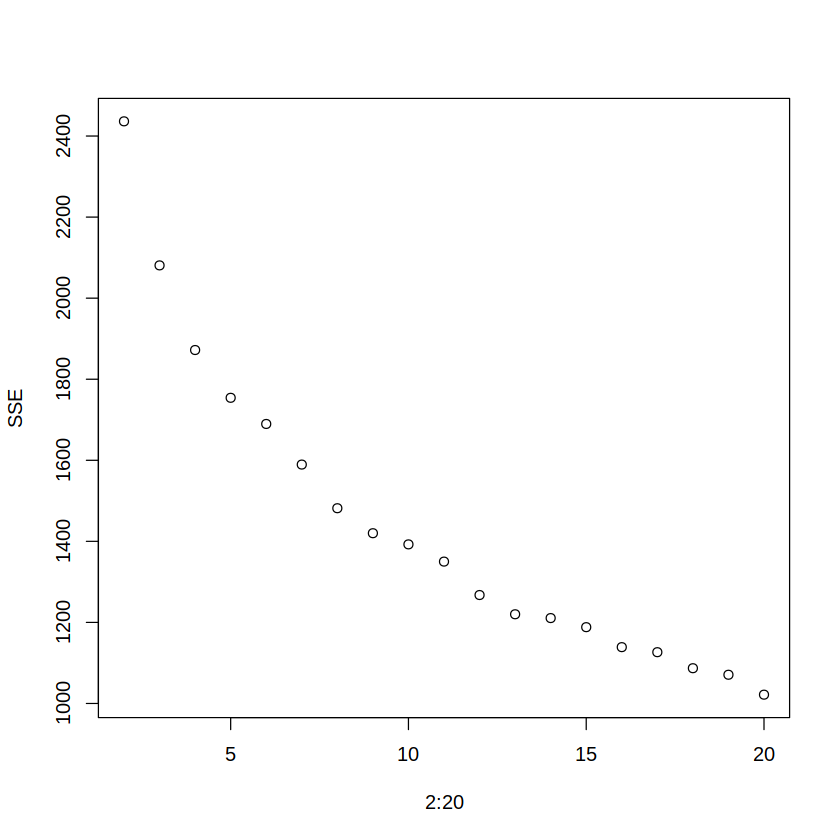

In [7]:
#k-meansでクラスタリング
SSE <- c()

for(k in 2:20){
  
  km.cluster <- kmeans(df_scale, centers=k)
  SSE <- c(SSE, km.cluster$tot.withinss)
}

plot(x=2:20,y=SSE)                        

In [26]:
#k=2で分割してシルエット分析
install.packages("factoextra")
library(cluster)
library(factoextra)

dis = dist(df_scale)^2                                                           
km.res <- kmeans(df_scale, centers = 2)
sil = silhouette(km.res$cluster, dis)

fviz_silhouette(sil)

Warning message:
“dependency ‘FactoMineR’ is not available”
also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘ggpubr’


Warning message in install.packages("factoextra"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘ggpubr’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘factoextra’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html'

ERROR: Error in library(factoextra): there is no package called ‘factoextra’


In [ ]:
#お題③

In [ ]:
#主成分分析
pc.res <- prcomp(df_scale)

summary(pc.res)

plot(pc.res$x[,c(1,2)])


In [ ]:
biplot(pc.res)

In [ ]:
#次元削減
#PCA
library(ggplot2)

df3 <- data.frame(df2,pc.res$x[,c(1,2)])

colnames(df3) <- c(colnames(df2),"PC1","PC2")
df3$Diabetes <- factor(df3$Diabetes)                                         

p <- ggplot(data=df3) + geom_point(aes(x=PC1,y=PC2,color=Diabetes))

p


In [ ]:
#t-SNE

install.packages("Rtsne")

library(Rtsne)

tsne.res <- Rtsne(as.matrix(df_scale))

df3 <-data.frame(df2,tsne.res$Y[,c(1,2)])

colnames(df3)<- c(colnames(df2),"tSNE1","tSNE2")
df3$Diabetes <- factor(df3$Diabetes)

p <- ggplot(data=df3) + geom_point(aes(x=tSNE1,y=tSNE2,color=Diabetes))

p


In [ ]:
#UMAP

install.packages("uwot")

library(uwot)

umap.res <- umap(as.matrix(df_scale)) 

df3 <- data.frame(df2,umap.res[,c(1,2)])

colnames(df3) <- c(colnames(df2),"UMAP1","UMAP2")
df3$Diabetes <- factor(df3$Diabetes)

p <- ggplot(data=df3) + geom_point(aes(x=UMAP1,y=UMAP2,color=Diabetes))

p
